# Метод k ближайших соседей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

## Генерация выборки

In [3]:
dataset = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=4, 
                                       n_clusters_per_class=1, random_state=1)
colors = ListedColormap(['r', 'y', 'g', 'b'])
light_colors = ListedColormap(['lightcoral', 'lightyellow', 'lightgreen', 'lightblue'])

In [4]:
def plot_2d_dataset(dataset, colors):
    plt.figure(figsize=(8, 8))
    plt.scatter(map(lambda x: x[0], dataset[0]), map(lambda x: x[1], dataset[0]), c=dataset[1], cmap=colors)

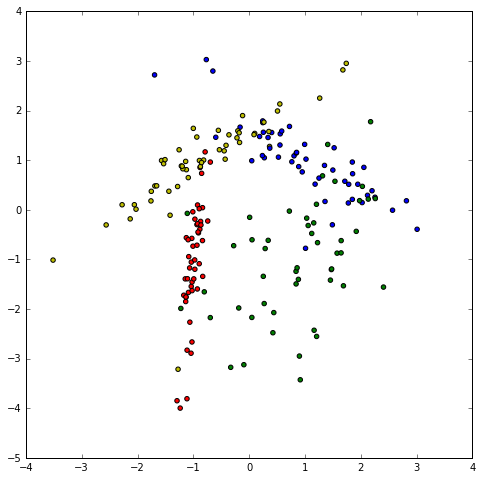

In [5]:
plot_2d_dataset(dataset, colors)

## Построение разделяющих поверхностей

In [6]:
from sklearn import model_selection, metrics, neighbors

Для построения разделяющих поверхностей разделим изначальную выборку на две части: обучающую и тестовую.

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(dataset[0], dataset[1], test_size=0.4, 
                                                                                     random_state = 1)

In [8]:
def get_meshgrid(data, step=0.05, border=0.5):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border 
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [9]:
def plot_decision_surface(k, estimator, train_data, train_labels, test_data, test_labels, colors=colors, 
                          light_colors=light_colors):
    estimator.fit(train_data, train_labels)
    
    plt.figure(figsize=(16, 6))
    
    plt.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_data, 0.05, 2)
    predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, predictions, cmap=light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=colors)
    plt.title('k = ' + str(k) + ', train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, 
                                                                                              estimator.predict(train_data))))

    plt.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap=colors)
    plt.title('k = ' + str(k) + ', test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, 
                                                                                             estimator.predict(test_data))))

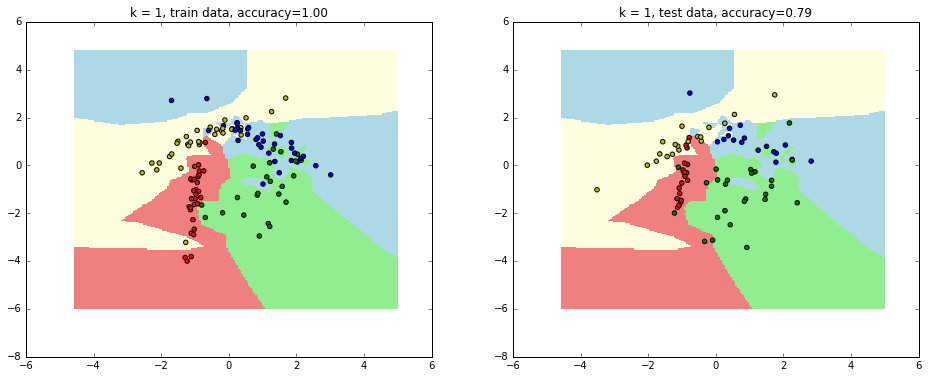

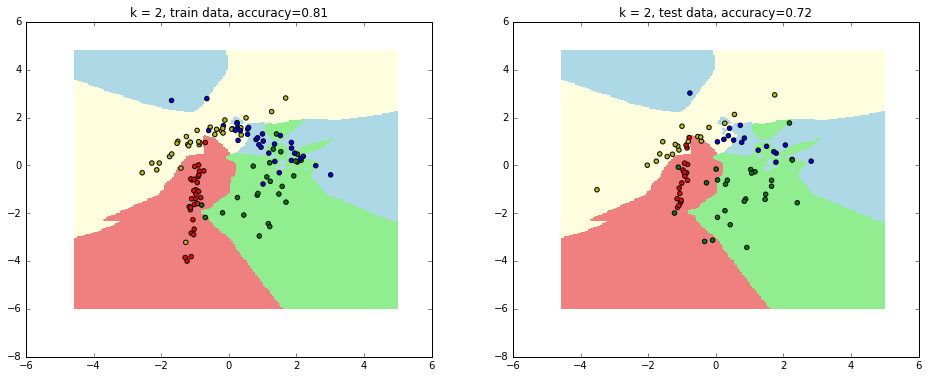

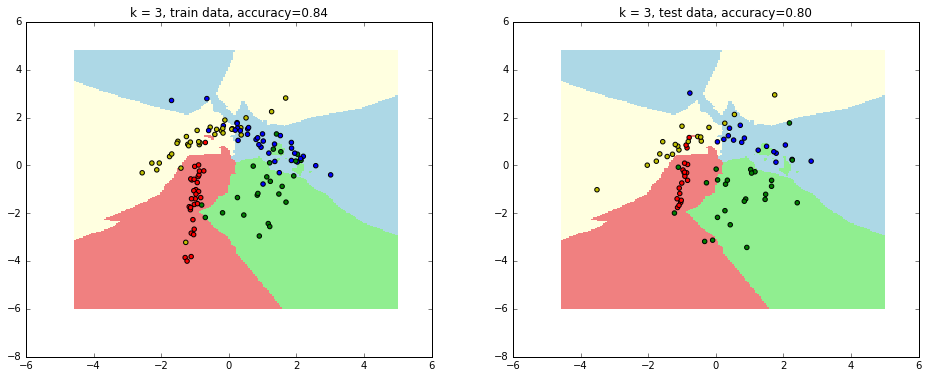

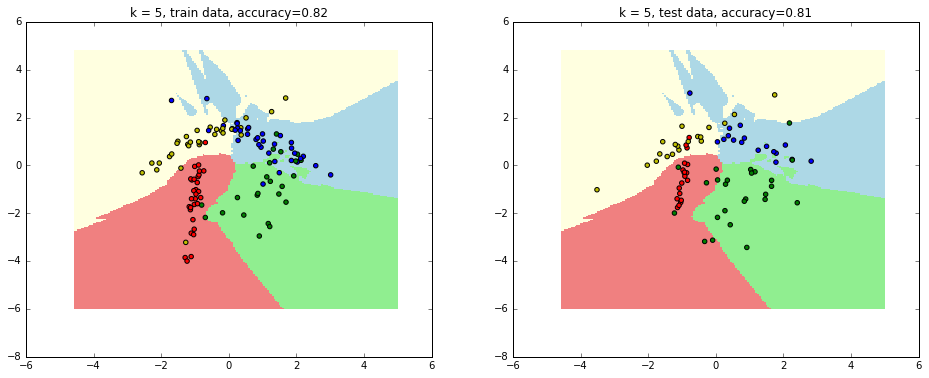

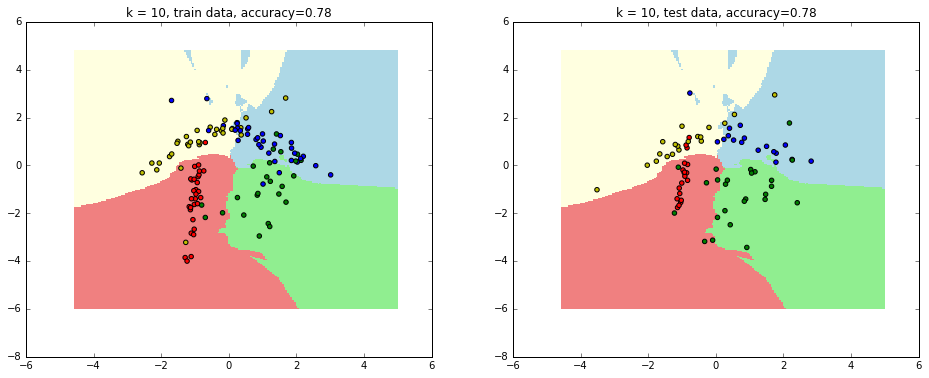

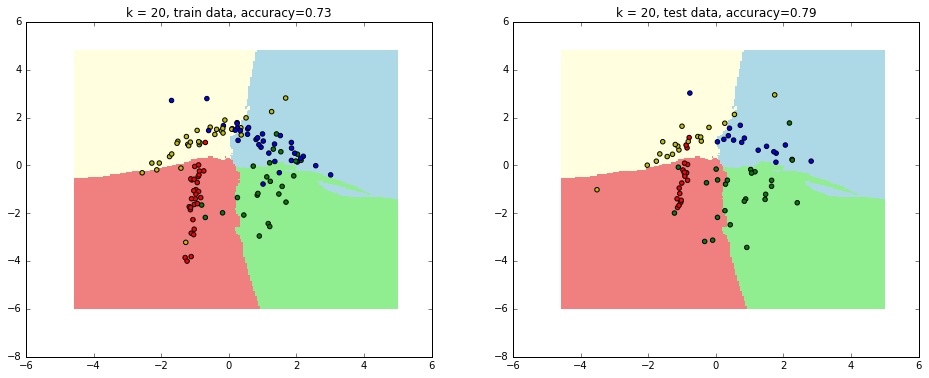

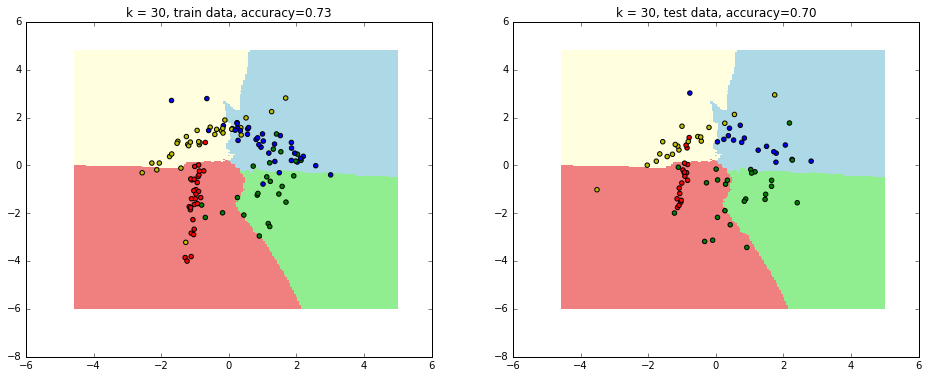

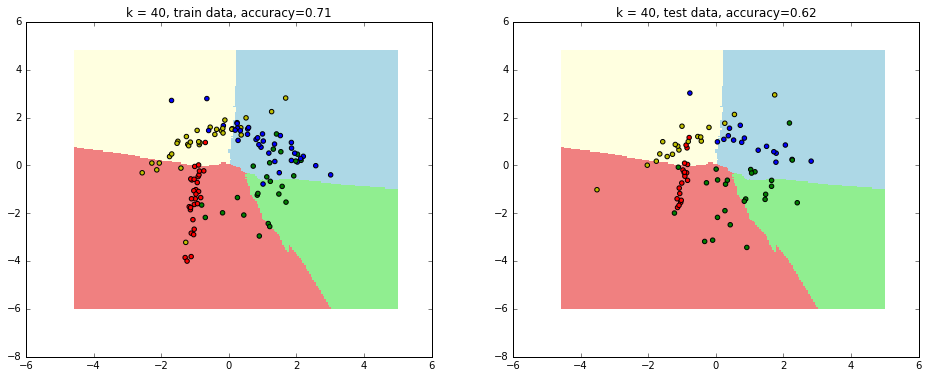

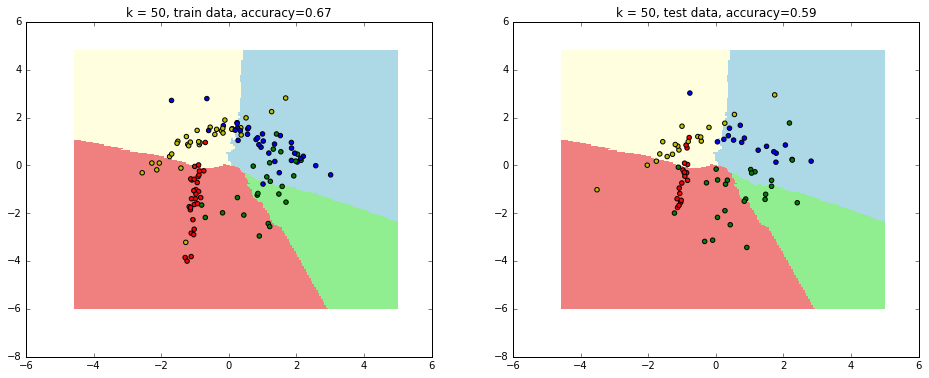

In [10]:
k = np.array([1, 2, 3, 5, 10, 20, 30, 40, 50])
for i in range(k.size):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k[i])
    plot_decision_surface(k[i], estimator, train_data, train_labels, test_data, test_labels)

## Зависимость accuracy от количества соседей

In [11]:
k = np.arange(1, 50)
accuracy = np.array([model_selection.cross_val_score(neighbors.KNeighborsClassifier(n_neighbors=k[i]), 
                                dataset[0], dataset[1], cv=model_selection.KFold(n_splits=5)).mean() for i in range(k.size)])

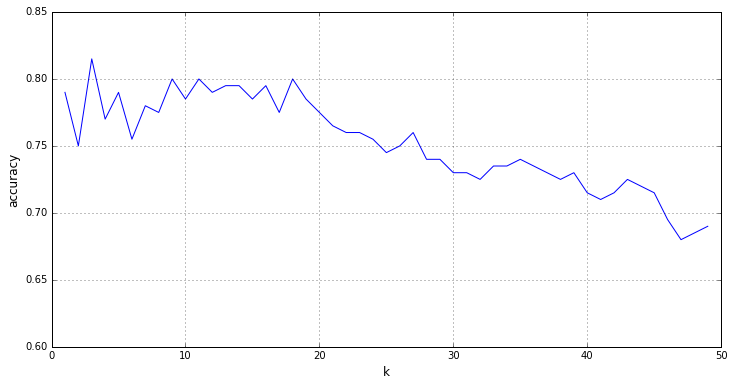

In [13]:
plt.figure(figsize=(12, 6))

plt.plot(k, accuracy)
plt.ylim(0.6, 0.85)
plt.xlabel("k", fontsize=12)
plt.ylabel("accuracy", fontsize=12)
plt.grid()
plt.show()

In [18]:
print [k[i] for i in range(k.size) if (accuracy == accuracy.max())[i]]

[3]


Из графика видно, что при больших k (20 и выше) точность прогноза резко уменьшается. Оптимальное k равно 3.